<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_13/Khalid_Almalki__PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

##**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import *
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.decomposition import PCA
sns.set_palette('Set2')

##**Importing the data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
710,3,158,64,13,387,31.2,0.295,24,0
232,1,79,80,25,37,25.4,0.583,22,0
266,0,138,0,0,0,36.3,0.933,25,1


##**Spliting Data**

In [3]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

##**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


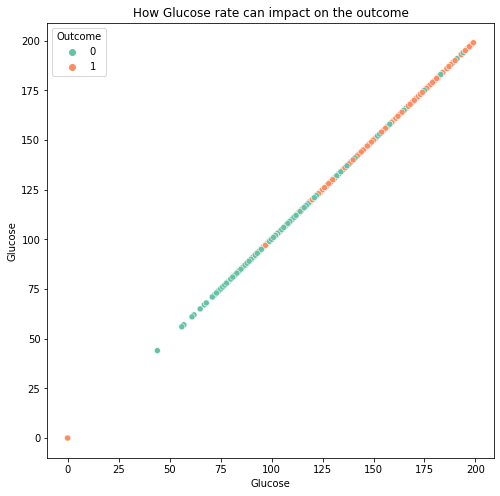

In [6]:
fig=plt.figure(figsize=(8,8))
sns.scatterplot(x=df.Glucose,y=df.Glucose,hue=df['Outcome'])
plt.title('How Glucose rate can impact on the outcome')
plt.show()

The above chart showed how the Glucose impacts on the outcome(Having a Diabetes), as more Glucose the patient has he or she will have a high probability to get a positive Diabetes test.

<Figure size 1440x576 with 0 Axes>

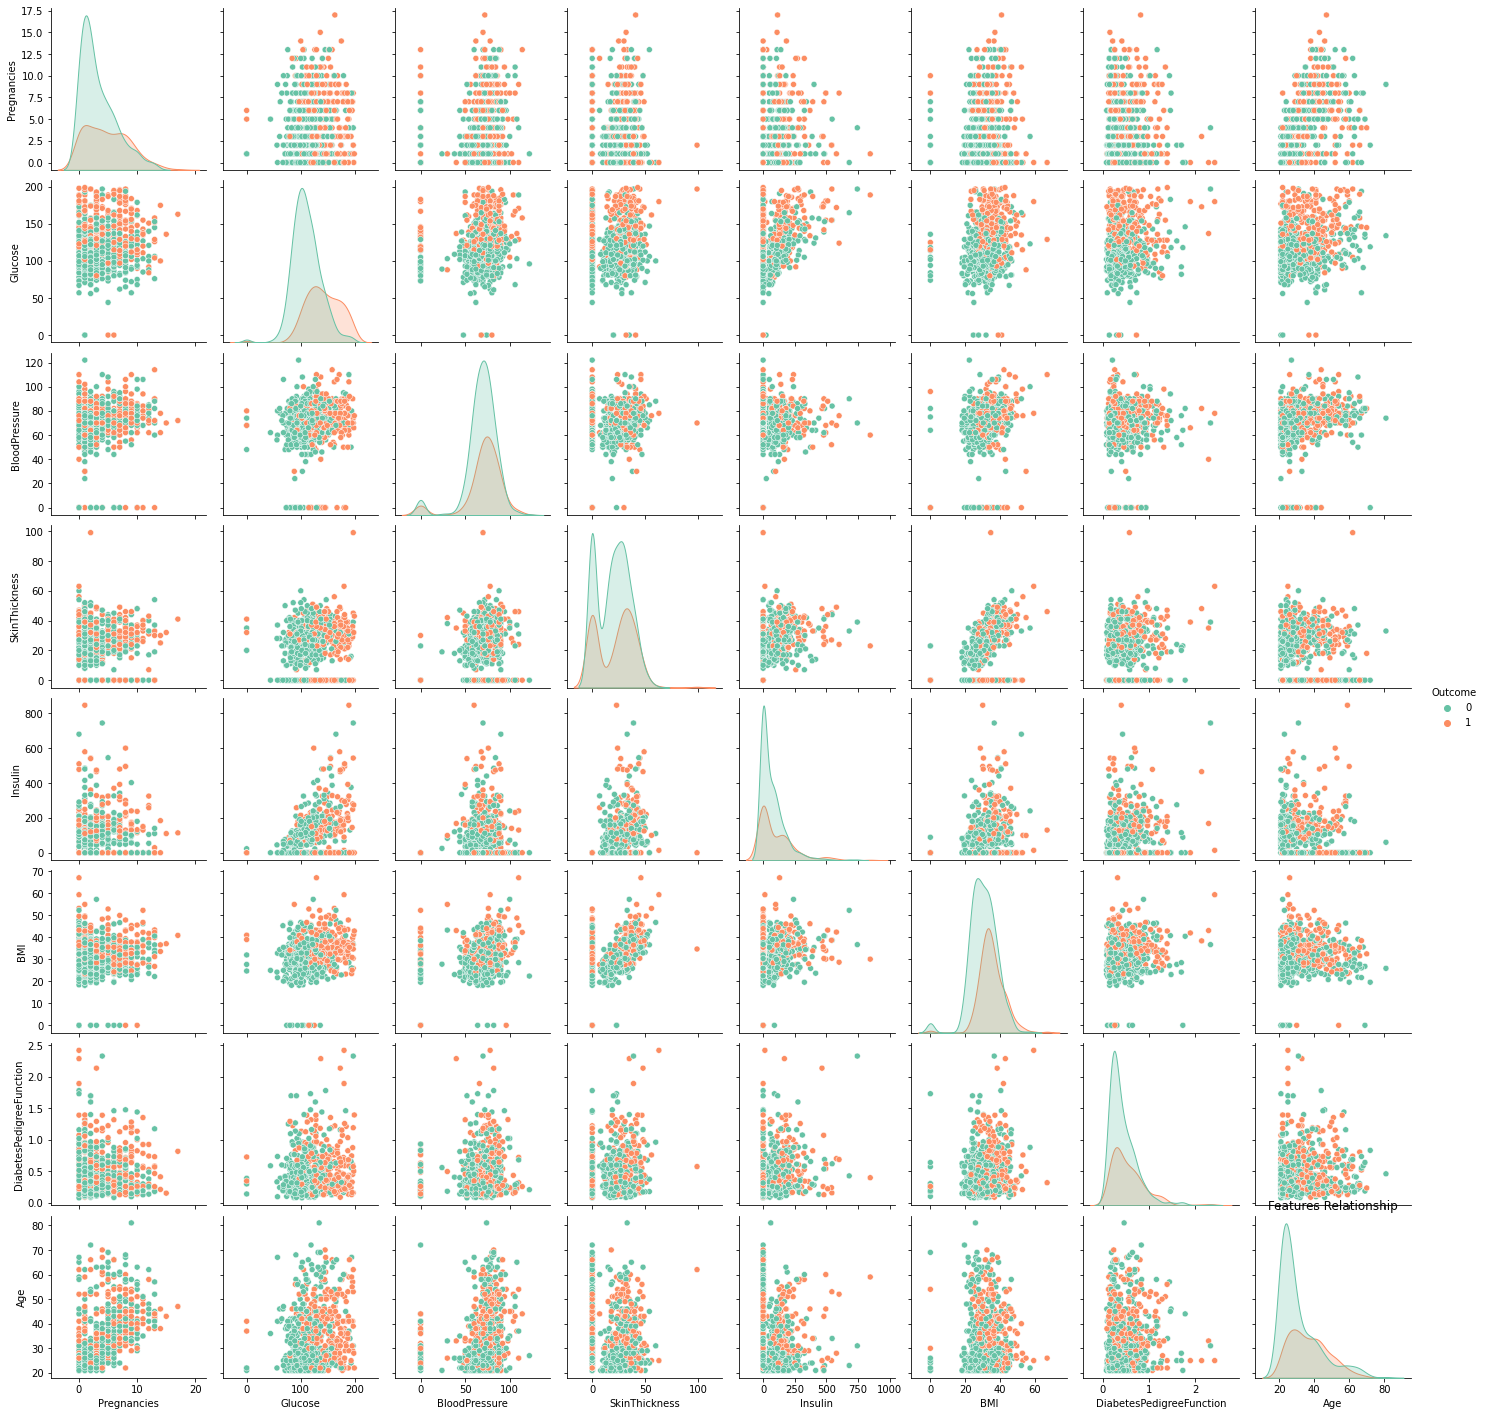

In [7]:
fig=plt.figure(figsize=(20,8))
sns.pairplot(data=df,hue='Outcome')
plt.title('Features Relationship')
plt.show()

The above chart showed the relationship between the dataset features. It is obvious there is no clear relationship so we need later to implement a PCA.

Outliers:


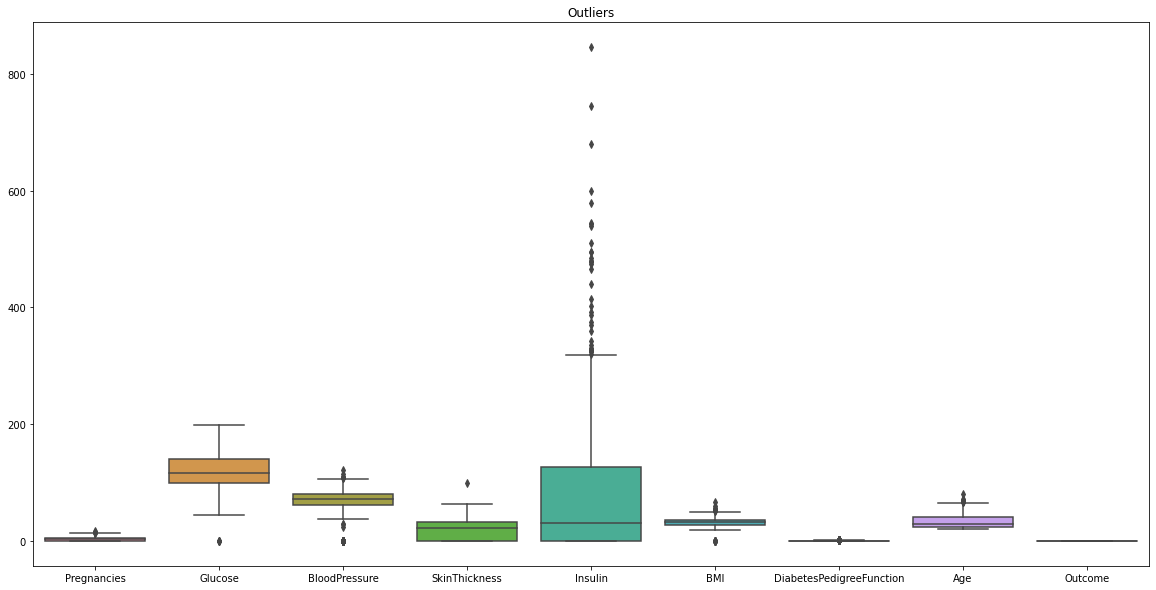

In [8]:
fig=plt.figure(figsize=(20,10))
plt.title('Outliers')
sns.boxplot(data=df);

This chart used only to show the outliers.

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# df=df[(df['Pregnancies']<df['Pregnancies'].quantile(.95))&
#       (df['Glucose']>df['Glucose'].quantile(.10))&
#       (df['Glucose']<df['Glucose'].quantile(.90))&
#       (df['BloodPressure']<df['BloodPressure'].quantile(.95))&
#       (df['BloodPressure']>df['BloodPressure'].quantile(.25))&
#       (df['SkinThickness']<df['SkinThickness'].quantile(.95))&
#       (df['Insulin']<df['Insulin'].quantile(.90))&
#       (df['BMI']<df['BMI'].quantile(.95))&
#       (df['BMI']>df['BMI'].quantile(.05))&
#       (df['DiabetesPedigreeFunction']<df['DiabetesPedigreeFunction'].quantile(.95))&
#       (df['Age']<df['Age'].quantile(.90))]

In [11]:
# fig=plt.figure(figsize=(20,10))
# plt.title('Outliers')
# sns.boxplot(data=df);

This chart used only to show the outliers.

In [12]:
df.shape

(768, 9)

##**Baseline**

In [13]:
def baseline_model(n_predictions, value_to_predict):
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)
baseline_value = y_train.value_counts().index[0]

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds

0      0
1      0
2      0
3      0
4      0
      ..
226    0
227    0
228    0
229    0
230    0
Length: 231, dtype: int64

In [14]:
bl_acc = accuracy_score(y_test , baseline_preds)
print('BaseLine Accurecy Score = ' , bl_acc)

BaseLine Accurecy Score =  0.5757575757575758


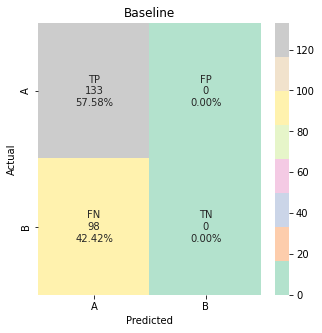

In [15]:
cf = confusion_matrix(y_test, baseline_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Baseline")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

##**StandardScaler Model**

In [16]:
standrd = StandardScaler()
col=X_train.columns
X_train = standrd.fit_transform(X_train)
X_train


array([[-0.861456  ,  0.1515723 ,  0.26195176, ..., -0.51298847,
        -1.0948496 , -0.26032101],
       [-0.861456  ,  1.91697437, -0.26509244, ...,  0.3006502 ,
        -0.40035994,  0.42704165],
       [ 0.96460403,  2.31960993, -0.05427476, ...,  0.5331184 ,
         0.86982511,  0.68480265],
       ...,
       [ 0.05157401, -0.90147455, -3.63817532, ..., -0.48715867,
         0.45861412, -0.17440067],
       [-0.861456  , -0.25106326,  0.8944048 , ..., -0.21594578,
        -0.96387129, -0.86176333],
       [ 0.66026069, -0.12717539, -0.47591012, ...,  0.24899061,
        -0.65317854,  0.59888232]])

In [17]:
pd.DataFrame(X_train,columns=col)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.861456,0.151572,0.261952,0.994785,-0.682276,-0.512988,-1.094850,-0.260321
1,-0.861456,1.916974,-0.265092,0.608849,0.842129,0.300650,-0.400360,0.427042
2,0.964604,2.319610,-0.054275,0.480204,-0.682276,0.533118,0.869825,0.684803
3,0.355917,2.102806,0.367361,0.415881,1.070790,1.527566,1.750121,1.715847
4,1.573291,1.607255,2.159311,0.222913,1.350265,1.760034,0.796721,1.801767
...,...,...,...,...,...,...,...,...
532,-0.252769,-1.211194,0.683587,0.673172,-0.089452,0.313565,2.535991,-0.518082
533,-0.252769,-0.251063,-0.686728,1.187753,-0.682276,-0.215946,0.297176,-0.260321
534,0.051574,-0.901475,-3.638175,-1.320830,-0.682276,-0.487159,0.458614,-0.174401
535,-0.861456,-0.251063,0.894405,-0.098700,-0.682276,-0.215946,-0.963871,-0.861763


In [18]:
X_test=standrd.transform(X_test)

##**Logistic Regression Model**

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
lr_preds1=lr.predict(X_test)

In [22]:
lr_acc1 = accuracy_score(y_test, lr_preds1)
print('Logistic Regression Accurecy Score = ' , lr_acc1)

Logistic Regression Accurecy Score =  0.7575757575757576


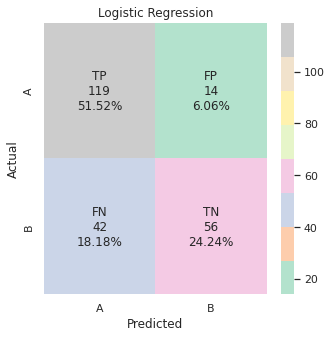

In [23]:
cf = confusion_matrix(y_test, lr_preds1)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

##**Model Accuracy Comparsion**

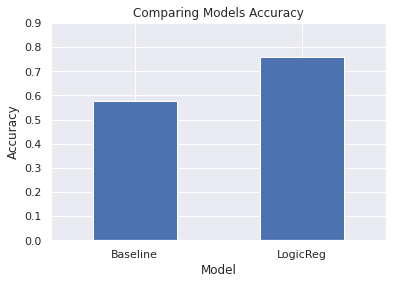

In [24]:
pd.DataFrame([bl_acc, lr_acc1 ]).plot.bar()
plt.xticks(np.arange(2),('Baseline','LogicReg'))
plt.legend().remove()
plt.ylim(0.0, 0.9)
plt.annotate = True
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Models Accuracy');

Good we have beaten the Baseline.

As the score did not beat the Baseline I will use Randomised

In [25]:
# parameters
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'],fit_intercept=[True,False],solver=['lbfgs','liblinear'])
# RandomizedSerach Object
clf = RandomizedSearchCV(lr, distributions, cv=10)


In [26]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f906df2c898>,
                                        'fit_intercept': [True, False],
                                        'penalty': ['l2', 'l1'],
                          

In [27]:
best_p=clf.best_params_

In [28]:
best_p

{'C': 1.724650588059859,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [29]:
lr = LogisticRegression(C= best_p['C'],penalty= best_p['penalty'],fit_intercept=best_p['fit_intercept'],solver=best_p['solver'])

In [30]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.724650588059859, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
lr_preds_rand=lr.predict(X_test)

In [32]:
lr_acc_rand = accuracy_score(y_test, lr_preds_rand)
print('Logistic Regression Accurecy Score After Randomized SearchCV Optimization = ' , lr_acc_rand)

Logistic Regression Accurecy Score After Randomized SearchCV Optimization =  0.7575757575757576


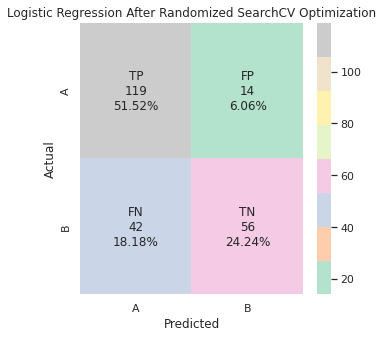

In [33]:
cf = confusion_matrix(y_test, lr_preds_rand)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression After Randomized SearchCV Optimization")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

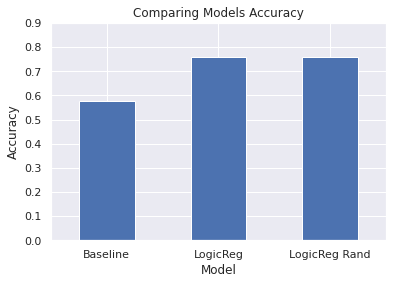

In [34]:
pd.DataFrame([bl_acc, lr_acc1,lr_acc_rand ]).plot.bar()
plt.xticks(np.arange(3),('Baseline','LogicReg','LogicReg Rand'))
plt.legend().remove()
plt.ylim(0.0, 0.9)
plt.annotate = True
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Models Accuracy');

##**Performing PCA**

In [35]:
pca=PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pd.DataFrame(X_train,columns=col)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.861456,0.151572,0.261952,0.994785,-0.682276,-0.512988,-1.094850,-0.260321
1,-0.861456,1.916974,-0.265092,0.608849,0.842129,0.300650,-0.400360,0.427042
2,0.964604,2.319610,-0.054275,0.480204,-0.682276,0.533118,0.869825,0.684803
3,0.355917,2.102806,0.367361,0.415881,1.070790,1.527566,1.750121,1.715847
4,1.573291,1.607255,2.159311,0.222913,1.350265,1.760034,0.796721,1.801767
...,...,...,...,...,...,...,...,...
532,-0.252769,-1.211194,0.683587,0.673172,-0.089452,0.313565,2.535991,-0.518082
533,-0.252769,-0.251063,-0.686728,1.187753,-0.682276,-0.215946,0.297176,-0.260321
534,0.051574,-0.901475,-3.638175,-1.320830,-0.682276,-0.487159,0.458614,-0.174401
535,-0.861456,-0.251063,0.894405,-0.098700,-0.682276,-0.215946,-0.963871,-0.861763


In [37]:
np.sum(pca.explained_variance_ratio_)

1.0

##**Useing Your Principal Components for a Logistic Regression Model**

In [38]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [39]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.724650588059859, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr_preds2=lr.predict(X_test)

In [41]:
lr_acc2 = accuracy_score(y_test, lr_preds2)
print('Logistic Regression Accurecy Score After PCA = ' , lr_acc2)

Logistic Regression Accurecy Score After PCA =  0.7575757575757576


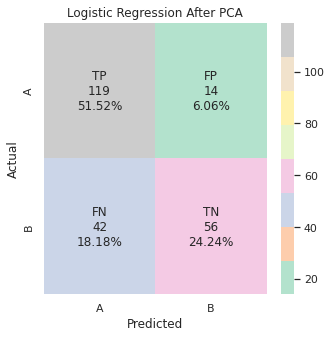

In [42]:
cf = confusion_matrix(y_test, lr_preds2)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['A', 'B']

plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=labels, fmt='', cmap='Pastel2', yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression After PCA")
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.set(font_scale=1);

##**Model Accuracy Comparsion After PCA**

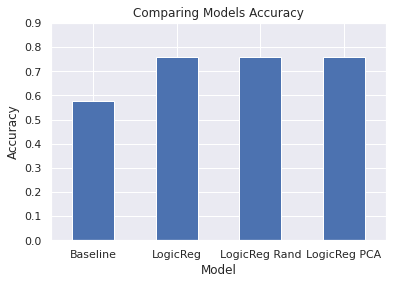

In [43]:
pd.DataFrame([bl_acc, lr_acc1,lr_acc_rand , lr_acc2 ]).plot.bar()
plt.xticks(np.arange(4),('Baseline','LogicReg','LogicReg Rand','LogicReg PCA'))
plt.legend().remove()
plt.ylim(0.0, 0.9)
plt.annotate = True
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation = 0)
plt.title('Comparing Models Accuracy');

As seen in the above chart, our Logistic model has not been improved applying PCA.

In [44]:

best_score= {'baseline model':bl_acc,
                 'Logistic model':lr_acc1,
                 'Logistic model After Randomized Optimization':lr_acc_rand,
                 'Logistic model After PCA':lr_acc2,
                 }

In [45]:
max_key = max(best_score, key=best_score.get)
max_value =best_score[max_key]

In [46]:
print(f'As seen in the above scores tests, we select {max_key} with an accuracy score:{max_value}')

As seen in the above scores tests, we select Logistic model with an accuracy score:0.7575757575757576


##**Bonus Question**

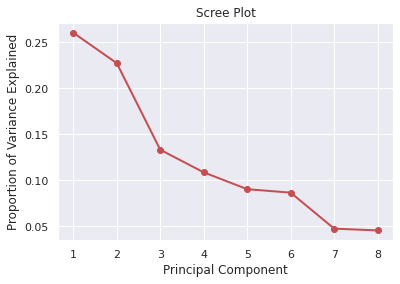

In [47]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

###**Reference:**

https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis